In [2]:
import pretty_midi
import numpy as np
from matplotlib import pyplot as plt

In [2]:
gh = pretty_midi.PrettyMIDI("./processed/midi/Heart - Barracuda.mid")
p2p = pretty_midi.PrettyMIDI("./clonehero/Heart - Barracuda/notes.mid")

In [3]:
end = gh.get_end_time()

In [4]:
intervals = np.linspace(0, end, 100)

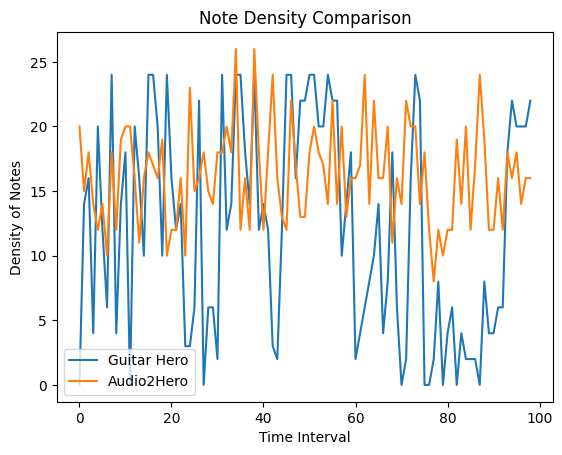

In [6]:
data_gh = []
data_p2p = []
for i in range(len(intervals)-1):
    start = intervals[i]
    end = intervals[i+1]
    
    in_interval = len([note for note in gh.instruments[0].notes if note.start >= start and note.end <= end])
    data_gh.append(in_interval)
    in_interval = len([note for note in p2p.instruments[0].notes if note.start >= start and note.end <= end])
    data_p2p.append(in_interval)

plt.plot(data_gh)
plt.plot(data_p2p)
plt.title("Note Density Comparison")
plt.xlabel("Time Interval")
plt.ylabel("Density of Notes")
plt.legend(["Guitar Hero", "Audio2Hero"])
plt.show()

In [6]:

def time_difference(song1,song2):
    track1 = song1 if song1.get_end_time() < song2.get_end_time() else song2
    track2 = song2 if song1.get_end_time() < song2.get_end_time() else song1
    dist_sum = 0
    for note in track1.instruments[0].notes:
        closest = min(track2.instruments[0].notes, key=lambda x: abs(x.start - note.start))
        dist = abs(closest.start - note.start)
        dist_sum += dist
    return dist_sum / len(song1.instruments[0].notes)

# print(time_difference(gh,p2p))

In [ ]:
import multiprocessing

In [8]:
import os
original_file_path = "./processed/midi/Heart - Barracuda.mid"
original_file_path_2 = "./clonehero/ZZ Top - La Grange/notes.mid"
song1 = pretty_midi.PrettyMIDI(original_file_path)
song2 = pretty_midi.PrettyMIDI(original_file_path_2)
similarity = time_difference(song1,song2)
print(similarity)

names = [i for i in os.listdir("./clonehero") if i != ".DS_Store"][0:20]
similarities = []
for name1 in names:
  sim = []
  for name2 in names:
      if name1 == ".DS_Store" or name2 == ".DS_Store":
          continue
      # original_file_path = f"./processed/midi/{name}.mid"
      original_file_path = f"./processed/midi/{name1}.mid"
      original_file_path_2 = f"./clonehero/{name2}/notes.mid"
      try:
        song1 = pretty_midi.PrettyMIDI(original_file_path)
        song2 = pretty_midi.PrettyMIDI(original_file_path_2)
        similarity = time_difference(song1,song2)
        print(name1, name2, similarity)
        sim.append(similarity)
      except:
        sim.append(-1)
        continue
  similarities.append(sim)

plt.plot(similarities)
plt.title("Similarity Scores (lower is better)")
plt.xlabel("Song")
plt.ylabel("Similarity")
plt.show()


0.24096063816127433
Aerosmith - Same Old Song & Dance Aerosmith - Same Old Song & Dance 0.2685104289940866
Aerosmith - Same Old Song & Dance Foghat - Slow Ride 0.11331323964497135
Aerosmith - Same Old Song & Dance Slash - Guitar Battle vs. Slash 0.109543552761343
Aerosmith - Same Old Song & Dance Eric Johnson - Cliffs Of Dover 0.14283261834319552
Aerosmith - Same Old Song & Dance Slipknot - Before I Forget 0.11014536489152074
Aerosmith - Same Old Song & Dance AFI - Miss Murder 0.14806247534516734
Aerosmith - Same Old Song & Dance Blue Öyster Cult - Cities On Flame With Rock & Roll 0.14127846400394456
Aerosmith - Same Old Song & Dance KISS - Rock & Roll All Nite 0.1473664940828392
Aerosmith - Same Old Song & Dance Pat Benatar - Hit Me with Your Best Shot 0.24614598126232917
Aerosmith - Same Old Song & Dance Pearl Jam - Even Flow 0.12550718688362955
Aerosmith - Same Old Song & Dance White Zombie - Black Sunshine 0.10088025147928809
Aerosmith - Same Old Song & Dance Disturbed - Stricken 0

: 

: 

In [39]:
import os
import pretty_midi
import multiprocessing
from functools import partial

def calculate_similarity(name1, name2, midi_folder="./processed/midi", clonehero_folder="./clonehero"):
    try:
        #original_file_path = os.path.join(midi_folder, f"{name1}.mid")
        original_file_path = os.path.join(midi_folder, f"{name1}")
        #original_file_path_2 = os.path.join(clonehero_folder, name2, "notes.mid")
        original_file_path_2 = os.path.join(clonehero_folder, f"{name2}")
        song1 = pretty_midi.PrettyMIDI(original_file_path)
        song2 = pretty_midi.PrettyMIDI(original_file_path_2)
        similarity = time_difference(song1, song2)
        return name1, name2, similarity
    except Exception as e:
        print(e)
        return name1, name2, -1

#def calculate_similarity_wrapper(names, midi_folder="./processed/midi", clonehero_folder="./clonehero"):
#    similarities = []
#    for name1 in names:
#        sim = []
#        for name2 in names:
#            if name1 == ".DS_Store" or name2 == ".DS_Store" or name1 == name2:
#                continue
#            sim.append((name1, name2))
#        similarities.append(sim)
#    return similarities

def run():
    # Define the list of song names
    #names = [i for i in os.listdir("./clonehero") if i != ".DS_Store"][0:20]
    names = [i for i in os.listdir("./new_cache/clonehero_processed/audio2hero") if i != ".DS_Store"][0:20]

    # Get the number of available CPU cores
    num_cores = multiprocessing.cpu_count()

    # Create a pool of workers
    pool = multiprocessing.Pool(processes=num_cores)

    # Calculate similarities in parallel
    #calculate_similarity_partial = partial(calculate_similarity, midi_folder="./new_cache/clonehero_processed/audio2hero", clonehero_folder="./new_cache/clonehero_processed/pop2piano")
    calculate_similarity_partial = partial(calculate_similarity, midi_folder="./new_cache/clonehero_processed/audio2hero", clonehero_folder="./new_cache/clonehero_processed/midi")
    #calculate_similarity_partial = partial(calculate_similarity, midi_folder="./processed/midi", clonehero_folder="./clonehero")
    similarity_results = pool.starmap(calculate_similarity_partial, [(name1, name2) for name1 in names for name2 in names])

    # Close the pool
    pool.close()
    pool.join()

    return similarity_results
    #plt.plot(similarity_results)
    #plt.title("Similarity Scores (lower is better)")
    #plt.xlabel("Song")
    #plt.ylabel("Similarity")
    #plt.show()


    # Plot the similarities
    # Your plotting code here

similarity_results = run()

data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127data byte must be in range 0..127

data byte must be in range 0..127data byte must be in range 0..127

data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127data byte must be in range 0..127

data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must

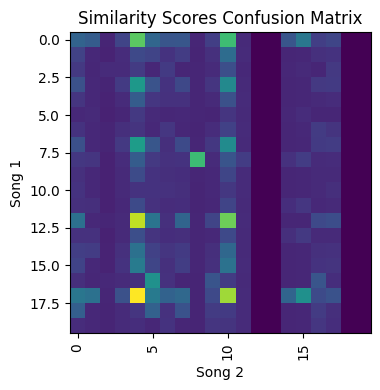

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(similarity_results, names):
    # Initialize an empty confusion matrix
    num_songs = len(names)
    confusion_matrix = np.zeros((num_songs, num_songs))

    # Populate the confusion matrix with similarity scores
    for name1, name2, similarity in similarity_results:
        index1 = names.index(name1)
        index2 = names.index(name2)
        confusion_matrix[index1][index2] = similarity

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    #sns.heatmap(confusion_matrix, annot=True, cmap='Blues', xticklabels=names, yticklabels=names)
    #sns.heatmap(confusion_matrix, annot=True, cmap='Blues', xticklabels=names, yticklabels=names)
    plt.imshow(confusion_matrix)
    plt.title("Similarity Scores Confusion Matrix")
    plt.xlabel("Song 2")
    plt.ylabel("Song 1")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Assuming similarity_results is your output
# Assuming names is your list of song names
#names = [i for i in os.listdir("./clonehero") if i != ".DS_Store"][0:20]
names = [i for i in os.listdir("./new_cache/clonehero_processed/audio2hero") if i != ".DS_Store"][0:20]

# Plot the confusion matrix
plot_confusion_matrix(similarity_results, names)


In [43]:
import numpy as np
from aubio import source, tempo

def get_beat_locations(filename):
    win_s = 512                 # Window size
    hop_s = win_s // 2          # Hop size
    samplerate = 44100          # Sample rate

    # Initialize aubio's tempo detection
    s = source(filename, samplerate, hop_s)
    o = tempo("default", win_s, hop_s, samplerate)

    # List to store beat locations
    beats = []

    # Process frames
    while True:
        samples, read = s()
        is_beat = o(samples)
        if is_beat:
            beats.append(o.get_last_s())
        if read < hop_s:
            break

    return np.array(beats)

# Example usage
midi_beats = get_beat_locations("./new_cache/clonehero_processed/midi/AFI - Medicate.mid")
audio_beats = get_beat_locations("./new_cache/clonehero_processed/audio/AFI - Medicate.ogg")

# Calculate some metric to compare the beat locations (e.g., mean absolute difference)
mean_abs_diff = np.mean(np.abs(midi_beats - audio_beats))
print("Mean Absolute Difference:", mean_abs_diff)

RuntimeError: AUBIO ERROR: source_wavread: Failed opening ./new_cache/clonehero_processed/audio/AFI - Medicate.ogg (could not find RIFF header)

In [48]:
midi_path_1 = "./new_cache/clonehero_processed/audio2hero/AFI - Medicate.mid"
midi_1 = pretty_midi.PrettyMIDI(midi_path_1)

In [54]:
audio_1 = midi_1.synthesize()

In [55]:
import librosa

In [98]:
#audio_path = "./new_cache/clonehero_processed/audio/AFI - Medicate.ogg"
audio_path = "./new_cache/clonehero_processed/audio/All The Young Dudes.ogg"
gt_audio_1, sample_rate = librosa.load(audio_path, sr=44100)

In [91]:
def normalized_dot_product(a, b):
    # Compute the dot product of corresponding entries
    dot_product = np.sum(a * b, axis=-1)

    # Compute the magnitudes of corresponding entries
    magnitude_a = np.linalg.norm(a, axis=-1)
    magnitude_b = np.linalg.norm(b, axis=-1)

    # Compute normalized dot product
    normalized_dot = dot_product / (magnitude_a * magnitude_b)

    return normalized_dot

In [96]:
import numpy as np

def dtw_distance(x, y):
    """
    Compute the dynamic time warping distance between two sequences x and y.
    
    Parameters:
    x, y : numpy arrays
        The sequences to be compared.
        
    Returns:
    float
        The dynamic time warping distance between the sequences.
    """
    # Lengths of sequences
    m, n = len(x), len(y)
    
    # Initialize the DTW matrix with zeros
    dtw_matrix = np.zeros((m + 1, n + 1))
    
    # Fill the first row and first column with infinity
    dtw_matrix[0, 1:] = np.inf
    dtw_matrix[1:, 0] = np.inf
    
    # Fill the rest of the matrix
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = abs(x[i - 1] - y[j - 1]) # Cost of matching two elements
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j],    # Insertion
                                           dtw_matrix[i, j - 1],    # Deletion
                                           dtw_matrix[i - 1, j - 1]) # Match
            
    # Return the DTW distance
    return dtw_matrix[m, n]

834.5948299319737


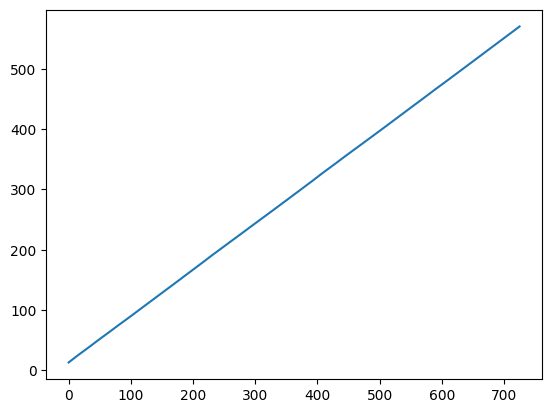

In [101]:
x = librosa.beat.beat_track(y=audio_1, units='time')[1]
y = librosa.beat.beat_track(y=gt_audio_1, units='time')[1]
#for beat in x[0:20]:
#    plt.axvline(beat, color='r', linestyle='--')
#y = gt_audio_1[2000:600000]
#y = gt_audio_1
#plt.plot(list(range(len(x))), x)
#z = normalized_dot_product(x,y)
z = dtw_distance(x,y)
print(z)
plt.plot(list(range(len(y))), y)
plt.show()

In [104]:
import os
import pretty_midi
import multiprocessing
from functools import partial

def calculate_similarity(name1, name2, midi_folder="./processed/midi", clonehero_folder="./clonehero"):
    try:
        #original_file_path = os.path.join(midi_folder, f"{name1}.mid")
        original_file_path = os.path.join(midi_folder, f"{name1}")
        #original_file_path_2 = os.path.join(clonehero_folder, name2, "notes.mid")
        original_file_path_2 = os.path.join(clonehero_folder, f"{name2}".replace(".mid", ".ogg"))
        song1 = pretty_midi.PrettyMIDI(original_file_path)

        audio_1 = song1.synthesize()
        gt_audio_1, _ = librosa.load(original_file_path_2, sr=44100, offset=10, duration=3)
        #song2 = pretty_midi.PrettyMIDI(original_file_path_2)
        similarity = dtw_distance(audio_1, gt_audio_1)
        return name1, name2, similarity
    except Exception as e:
        print(e)
        return name1, name2, -1

#def calculate_similarity_wrapper(names, midi_folder="./processed/midi", clonehero_folder="./clonehero"):
#    similarities = []
#    for name1 in names:
#        sim = []
#        for name2 in names:
#            if name1 == ".DS_Store" or name2 == ".DS_Store" or name1 == name2:
#                continue
#            sim.append((name1, name2))
#        similarities.append(sim)
#    return similarities

def run():
    # Define the list of song names
    #names = [i for i in os.listdir("./clonehero") if i != ".DS_Store"][0:20]
    names = [i for i in os.listdir("./new_cache/clonehero_processed/audio2hero") if i != ".DS_Store"][0:20]

    # Get the number of available CPU cores
    num_cores = multiprocessing.cpu_count()

    # Create a pool of workers
    pool = multiprocessing.Pool(processes=num_cores)

    # Calculate similarities in parallel
    #calculate_similarity_partial = partial(calculate_similarity, midi_folder="./new_cache/clonehero_processed/audio2hero", clonehero_folder="./new_cache/clonehero_processed/pop2piano")
    calculate_similarity_partial = partial(calculate_similarity, midi_folder="./new_cache/clonehero_processed/audio2hero", clonehero_folder="./new_cache/clonehero_processed/audio")
    #calculate_similarity_partial = partial(calculate_similarity, midi_folder="./processed/midi", clonehero_folder="./clonehero")
    similarity_results = pool.starmap(calculate_similarity_partial, [(name1, name2) for name1 in names for name2 in names])

    # Close the pool
    pool.close()
    pool.join()

    return similarity_results
    #plt.plot(similarity_results)
    #plt.title("Similarity Scores (lower is better)")
    #plt.xlabel("Song")
    #plt.ylabel("Similarity")
    #plt.show()


    # Plot the similarities
    # Your plotting code here

similarity_results = run()

Unable to allocate 3.57 TiB for an array with shape (3711808, 132301) and data type float64Unable to allocate 3.57 TiB for an array with shape (3711808, 132301) and data type float64Unable to allocate 3.57 TiB for an array with shape (3711808, 132301) and data type float64


Unable to allocate 3.57 TiB for an array with shape (3711808, 132301) and data type float64Unable to allocate 3.57 TiB for an array with shape (3711808, 132301) and data type float64Unable to allocate 3.57 TiB for an array with shape (3711808, 132301) and data type float64


Unable to allocate 3.57 TiB for an array with shape (3711808, 132301) and data type float64Unable to allocate 3.57 TiB for an array with shape (3711808, 132301) and data type float64Unable to allocate 3.57 TiB for an array with shape (3711808, 132301) and data type float64


Unable to allocate 7.47 TiB for an array with shape (7761486, 132301) and data type float64
Unable to allocate 3.57 TiB for an array with shape (3711808, 132301) and data t

KeyboardInterrupt: 

Unable to allocate 8.40 TiB for an array with shape (8728872, 132301) and data type float64
Unable to allocate 8.40 TiB for an array with shape (8728872, 132301) and data type float64Unable to allocate 8.40 TiB for an array with shape (8728872, 132301) and data type float64Unable to allocate 9.22 TiB for an array with shape (9575730, 132301) and data type float64Unable to allocate 9.22 TiB for an array with shape (9575730, 132301) and data type float64



Unable to allocate 12.3 TiB for an array with shape (12779583, 132301) and data type float64Unable to allocate 8.65 TiB for an array with shape (8985146, 132301) and data type float64

Unable to allocate 8.65 TiB for an array with shape (8985146, 132301) and data type float64
Unable to allocate 7.47 TiB for an array with shape (7761486, 132301) and data type float64
Unable to allocate 8.40 TiB for an array with shape (8728872, 132301) and data type float64
Unable to allocate 8.40 TiB for an array with shape (8728872, 132301) and data 

In [2]:
import pickle

with open('dtw_distance.pkl', 'rb') as f:
    # Load the pickled data
    loaded_data = pickle.load(f)


In [3]:
import matplotlib.pyplot as plt

In [7]:
print(loaded_data)

[array([0.46534638, 0.12430582, 0.08300282, 0.71939199, 0.40034975,
       0.03823258, 0.119227  , 0.00131458, 0.26005392]), array([0.95234965, 0.04996625, 0.09073531, 0.01934324, 0.0014865 ,
       0.1098273 , 0.0552077 , 0.25750763, 0.02245332]), array([-1., -1., -1., -1., -1., -1., -1., -1., -1.]), array([-1., -1., -1., -1., -1., -1., -1., -1., -1.]), array([0.98196919, 0.00106502, 0.0052189 , 0.136774  , 0.04492595,
       0.02009706, 0.00142106, 0.11972761, 0.01555846]), array([0.1598332 , 0.23401006, 0.19322378, 0.68568263, 0.46076323,
       0.1403732 , 0.22991724, 0.05398206, 0.35272248]), array([0.31083823, 0.20018924, 0.15834277, 0.69590218, 0.44409901,
       0.10571366, 0.19591703, 0.02772315, 0.32619046]), array([0.894538  , 0.01143867, 0.0025717 , 0.40185467, 0.1644795 ,
       0.0054496 , 0.01179513, 0.07271842, 0.07527846]), array([0.98286603, 0.00119324, 0.00728431, 0.12470421, 0.03875698,
       0.02356287, 0.00172696, 0.12709831, 0.01242879])]


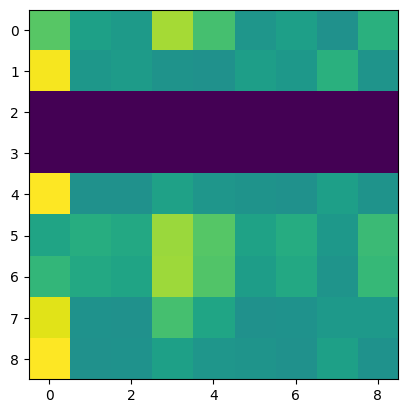

In [6]:
plt.imshow(loaded_data)
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import signal


In [12]:
a = np.array([0,1,2,3,4,5,6])
b = np.array([1, 2, 3, 4,5,6,7])
#print(np.correlate(a,b))
print(np.dot(a,b))

112


[array([0.56386885, 0.22399078, 0.33844491, 0.08106297, 0.13955417,
       0.28374662, 0.2584181 , 0.44287334, 0.38452526]), array([0.19969497, 0.48067199, 0.33506579, 0.1764098 , 0.30095338,
       0.39566529, 0.43352134, 0.25341476, 0.29394405]), array([-1., -1., -1., -1., -1., -1., -1., -1., -1.]), array([-1., -1., -1., -1., -1., -1., -1., -1., -1.]), array([0.15013862, 0.37964582, 0.25448895, 0.35557996, 0.60297775,
       0.29738032, 0.32307391, 0.19016901, 0.22263755]), array([0.23318962, 0.36368748, 0.38935273, 0.132389  , 0.22709643,
       0.4603295 , 0.41928953, 0.29617372, 0.34239306]), array([0.21383505, 0.41180004, 0.35791745, 0.14948823, 0.25678521,
       0.42373251, 0.46503055, 0.27147896, 0.31432713]), array([0.35044085, 0.26757692, 0.39764293, 0.10357845, 0.17102991,
       0.33542776, 0.3064781 , 0.44591957, 0.44967689]), array([0.1492357 , 0.37752608, 0.25310062, 0.37013486, 0.59917767,
       0.29558499, 0.32097232, 0.18900595, 0.22138696])]
0
1
2
3
4
5
6
[[1. 0. 0

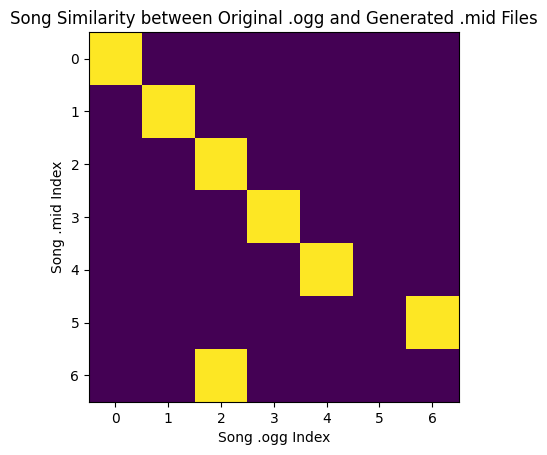

In [40]:
with open('dot.pkl', 'rb') as f:
    # Load the pickled data
    loaded_data = pickle.load(f)
print(loaded_data)
arr = np.delete(loaded_data, [2,3], axis=0)
arr = np.delete(arr, [2,3], axis=1)
post_process=np.copy(arr)

for row in range(len(arr)):
    print(row)
    max_index = np.argmax(arr[row])
    result = np.zeros_like(arr[row])
    #result[max_index] = arr[row][max_index]
    result[max_index] = 1
    arr[row] = result
# Drop columns 2 and 3
#arr = np.deletearr, [1, 2], axis=1
print(arr)
plt.title("Song Similarity between Original .ogg and Generated .mid Files")
plt.xlabel("Song .ogg Index")
plt.ylabel("Song .mid Index")
#plt.imshow(post_process)
plt.imshow(arr)
plt.show()

[array([0.35169076, 0.13970534, 0.21109155, 0.0505598 , 0.08704136,
       0.17697566, 0.16117801, 0.27622463, 0.23983233, 0.14785918,
       0.07129518, 0.19038659, 0.27379992, 0.17453743, 0.34213511,
       0.18541341, 0.03684221, 0.26257782, 0.08052366, 0.29628664,
       0.26232808, 0.13048124, 0.18187679, 0.08622099]), array([0.12620917, 0.30378938, 0.21176484, 0.11149271, 0.19020547,
       0.25006432, 0.27398971, 0.1601606 , 0.1857755 , 0.29912647,
       0.15629958, 0.23313649, 0.16090685, 0.25291348, 0.11753725,
       0.23887205, 0.08170288, 0.16965627, 0.17616121, 0.14867251,
       0.08974372, 0.28388305, 0.24252724, 0.18845655]), array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]), array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]), array([0.09036684, 0.2285048 , 0.1531742 , 0.21401981, 0.36292591,
       0.1

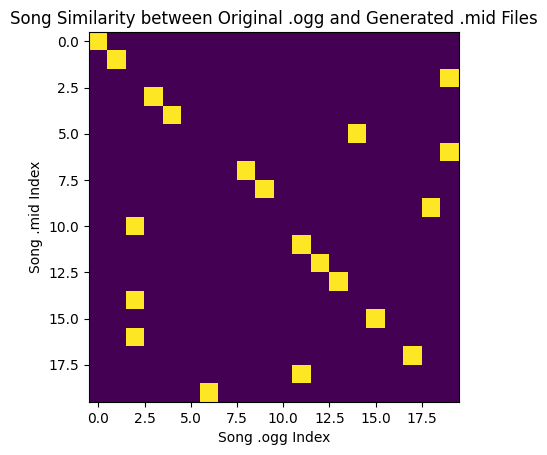

In [51]:
with open('dot_big.pkl', 'rb') as f:
    # Load the pickled data
    loaded_data = pickle.load(f)
print(loaded_data)
arr = np.delete(loaded_data, [2,3, 15, 21], axis=0)
arr = np.delete(arr, [2,3, 15,21], axis=1)
post_process=np.copy(arr)

for row in range(len(arr)):
    print(row)
    max_index = np.argmax(arr[row])
    result = np.zeros_like(arr[row])
    #result[max_index] = arr[row][max_index]
    result[max_index] = 1
    arr[row] = result
# Drop columns 2 and 3
#arr = np.deletearr, [1, 2], axis=1
print(arr)
plt.title("Song Similarity between Original .ogg and Generated .mid Files")
plt.xlabel("Song .ogg Index")
plt.ylabel("Song .mid Index")
#plt.imshow(post_process)
plt.imshow(arr)
plt.show()

[[0.35169076 0.13970534 0.08704136 0.17697566 0.16117801 0.27622463
  0.23983233 0.14785918 0.07129518 0.19038659 0.27379992 0.17453743
  0.34213511 0.03684221 0.26257782 0.08052366 0.29628664 0.26232808
  0.18187679 0.08622099]
 [0.12620917 0.30378938 0.19020547 0.25006432 0.27398971 0.1601606
  0.1857755  0.29912647 0.15629958 0.23313649 0.16090685 0.25291348
  0.11753725 0.08170288 0.16965627 0.17616121 0.14867251 0.08974372
  0.24252724 0.18845655]
 [0.09036684 0.2285048  0.36292591 0.17899006 0.19445476 0.11446071
  0.13400318 0.21389666 0.30132735 0.16789147 0.11454346 0.17968731
  0.08487004 0.15597632 0.12219842 0.34012581 0.10576731 0.064526
  0.17213203 0.36411349]
 [0.14669662 0.22879116 0.14286347 0.28958743 0.26376971 0.18631912
  0.21539512 0.24205938 0.11716119 0.27046494 0.18752034 0.28559627
  0.13617965 0.06076866 0.19681294 0.13221719 0.1732215  0.10412021
  0.28280848 0.14152723]
 [0.1360199  0.2619449  0.16334038 0.26953511 0.29580468 0.17268704
  0.19994264 0.2771

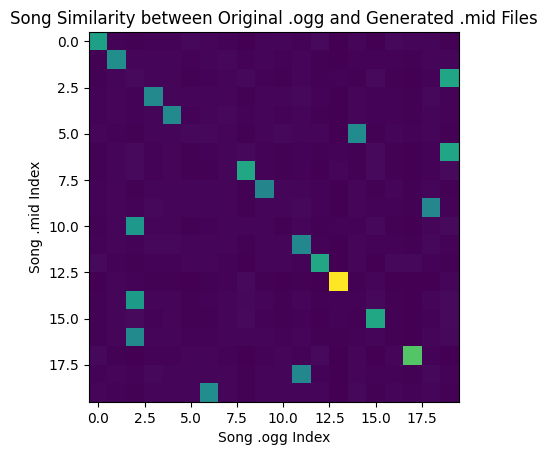

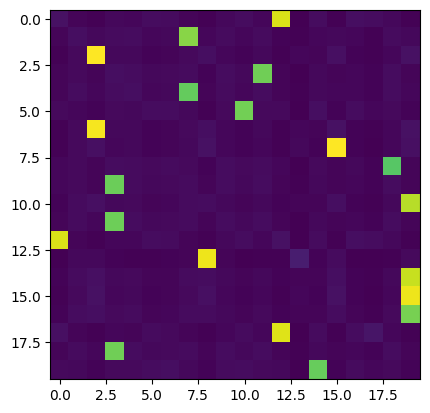

In [65]:
plt.title("Song Similarity between Original .ogg and Generated .mid Files")
plt.xlabel("Song .ogg Index")
plt.ylabel("Song .mid Index")
#plt.imshow(post_process)
arr = np.delete(loaded_data, [2, 3, 15, 21], axis=0)
arr = np.delete(arr, [2, 3, 15, 21], axis=1)
print(arr)

data = arr
max_indices = np.argmax(data, axis=1)

# Create a mask to identify the maximum values
mask = np.zeros_like(data)
rows = np.arange(data.shape[0])
mask[rows, max_indices] = 1

# Set the intensity of maximum value pixels to a higher value
data_with_bright_max = np.where(mask, data * 20, data)


plt.imshow(data_with_bright_max)
plt.show()


# Find the indices of the second greatest values in each row
max_indices = np.argsort(data, axis=1)[:, -2]

# Create a mask to identify the second greatest values
mask = np.zeros_like(data)
rows = np.arange(data.shape[0])
mask[rows, max_indices] = 1

# Set the intensity of second greatest value pixels to a higher value
data_with_bright_second_max = np.where(mask, data * 20, data)


plt.imshow(data_with_bright_second_max)
plt.show()

[array([-1., -1., -1., -1.]), array([-1., -1., -1., -1.]), array([-1., -1., -1., -1.]), array([-1., -1., -1., -1.])]
0
1
2
3
[array([1., 0., 0., 0.]), array([1., 0., 0., 0.]), array([1., 0., 0., 0.]), array([1., 0., 0., 0.])]


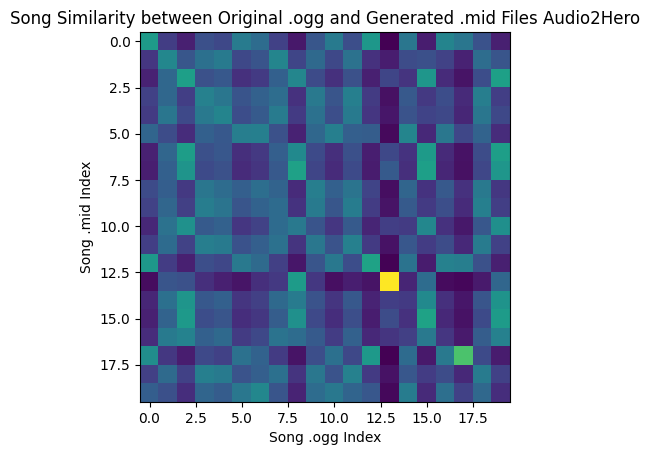

In [67]:
with open('dot_big_audio2hero.pkl', 'rb') as f:
    # Load the pickled data
    loaded_data = pickle.load(f)
print(loaded_data)
#arr = np.delete(loaded_data, [2,3, 15, 21], axis=0)
#arr = np.delete(arr, [2,3, 15,21], axis=1)
#post_process=np.copy(arr)
arr = loaded_data

for row in range(len(arr)):
    print(row)
    max_index = np.argmax(arr[row])
    result = np.zeros_like(arr[row])
    #result[max_index] = arr[row][max_index]
    result[max_index] = 1
    arr[row] = result
# Drop columns 2 and 3
#arr = np.deletearr, [1, 2], axis=1
print(arr)
plt.title("Song Similarity between Original .ogg and Generated .mid Files Audio2Hero")
plt.xlabel("Song .ogg Index")
plt.ylabel("Song .mid Index")
plt.imshow(loaded_data)
#plt.imshow(arr)
plt.show()

In [63]:
cm = np.array(similarities)
cm = cm[cm!=-1]
cm[cm>1] = -0.001
cm = cm.reshape((19,19))

Text(0, 1, 'r-squared = -0.251')

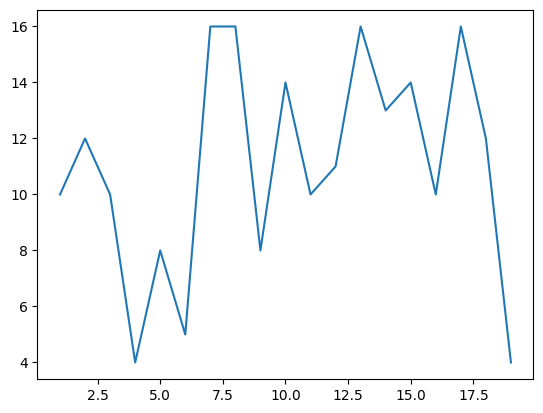

In [70]:
from sklearn.metrics import r2_score
x = range(1,len(cm)+1)
y = np.argmin(cm,axis=0)

a, b = np.polyfit(x, y, 1)
plt.plot(x,y)
plt.plot(x, a*np.array(x)+b)
plt.annotate("r-squared = {:.3f}".format(r2_score(range(1,len(cm)+1), np.argmin(cm,axis=0))), (0, 1))

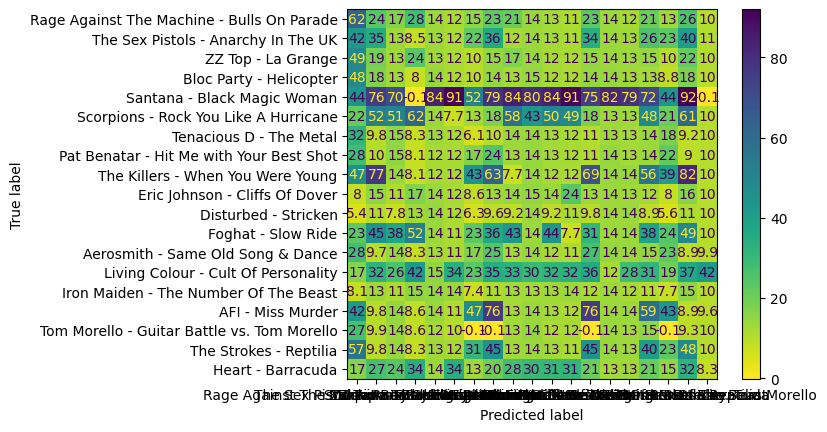

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm*100,display_labels=[name for name in names if "Slash" not in name])
disp.plot(cmap='viridis_r')
plt.show()